In [1]:
from pydrawnet.renderers import SeqRenderer, FreeformRenderer
from pydrawnet import layers, operations
import math
import matplotlib.pyplot as plt

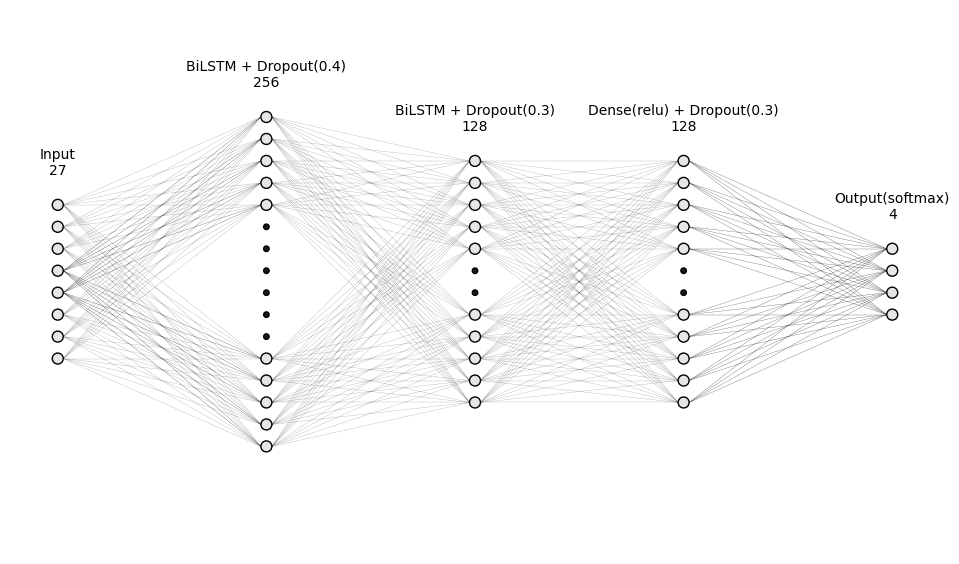

In [218]:
import matplotlib.pyplot as plt
from pydrawnet.renderers import SeqRenderer
from pydrawnet import layers, operations

SR = SeqRenderer()

'''
model = Sequential([
    Input(shape=(sequence_length, x_train_rnn.shape[2])),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.4),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
'''

line_kwargs = {"linewidths": 0.2, "alpha": 0.4}

SR.add_layer(
    layers.Layer1D(
        27, 1, "Input",
        shape_spacing=1,
        limited=8, 
    )
)
SR.add_operation(
    operations.DenseOp(
        8, 16,
        "",
        limited_ends=5,
        line_kwargs=line_kwargs
    )
)
SR.add_layer(
    layers.Layer1D(
        256, 1,
        "BiLSTM + Dropout(0.4)",
        limited=16,
        shape_spacing=1,
    )
)

SR.add_operation(
    operations.DenseOp(
        16, 12,
        "",
        limited_ends=5,
        line_kwargs=line_kwargs
    )
)
SR.add_layer(
    layers.Layer1D(
        128, 1,
        "BiLSTM + Dropout(0.3)",
        limited=12,
        shape_spacing=1,
    )
)
SR.add_operation(
    operations.DenseOp(
        12, 12,
        "",
        limited_ends=5,
        line_kwargs=line_kwargs
    )
)
SR.add_layer(
    layers.Layer1D(
        128, 1,
        "Dense(relu) + Dropout(0.3)",
        limited=12,
        shape_spacing=1,
    )
)
SR.add_operation(
    operations.DenseOp(
        12, 4,
        "",
        limited_ends=[5, 4],
        line_kwargs=line_kwargs
    )
)
SR.add_layer(
    layers.Layer1D(
        4, 1,
        "Output(softmax)",
        shape_spacing=1
    )
)

SR.make_figure((12, 15))
SR.render(12, text_y_offset=2)
plt.show()